## Importing libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [2]:
data = pd.read_csv('churn_data.csv')

In [3]:
data.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


## Exploratory Data Analysis 

In [4]:
data.isna().any()

user                       False
churn                      False
age                         True
housing                    False
credit_score                True
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

In [5]:
data=data[pd.notnull(data['age'])]

In [6]:
data = data.drop(columns = ['credit_score', 'rewards_earned'])

In [7]:
data2 = data.drop(columns =['user', 'churn'])

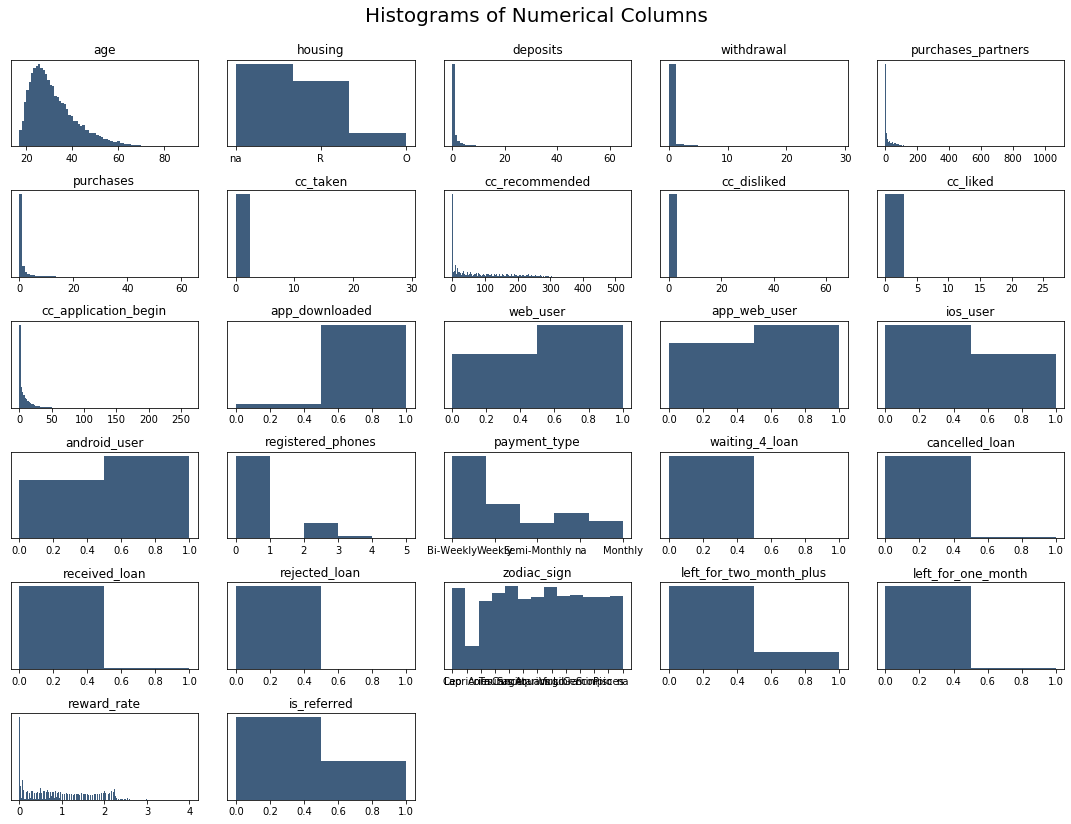

In [8]:
fig =plt.figure(figsize=(15,12))
plt.suptitle('Histograms of Numerical Columns', fontsize = 20)
for i in range(1, data2.shape[1]+1):
    plt.subplot(6,5,i)# 6 rows of graphs 
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(data2.columns.values[i - 1])
    vals = np.size(data2.iloc[:,i-1].unique())
    
    plt.hist(data2.iloc[:, i - 1], bins=vals, color = '#3F5D7D')
plt.tight_layout(rect =[0,0.03, 1, 0.95])

In [9]:
data2= data[['housing','is_referred','app_downloaded','web_user','app_web_user', 'ios_user','android_user','registered_phones','payment_type','waiting_4_loan','cancelled_loan','received_loan','rejected_loan','zodiac_sign','left_for_two_month_plus','left_for_one_month','is_referred']]

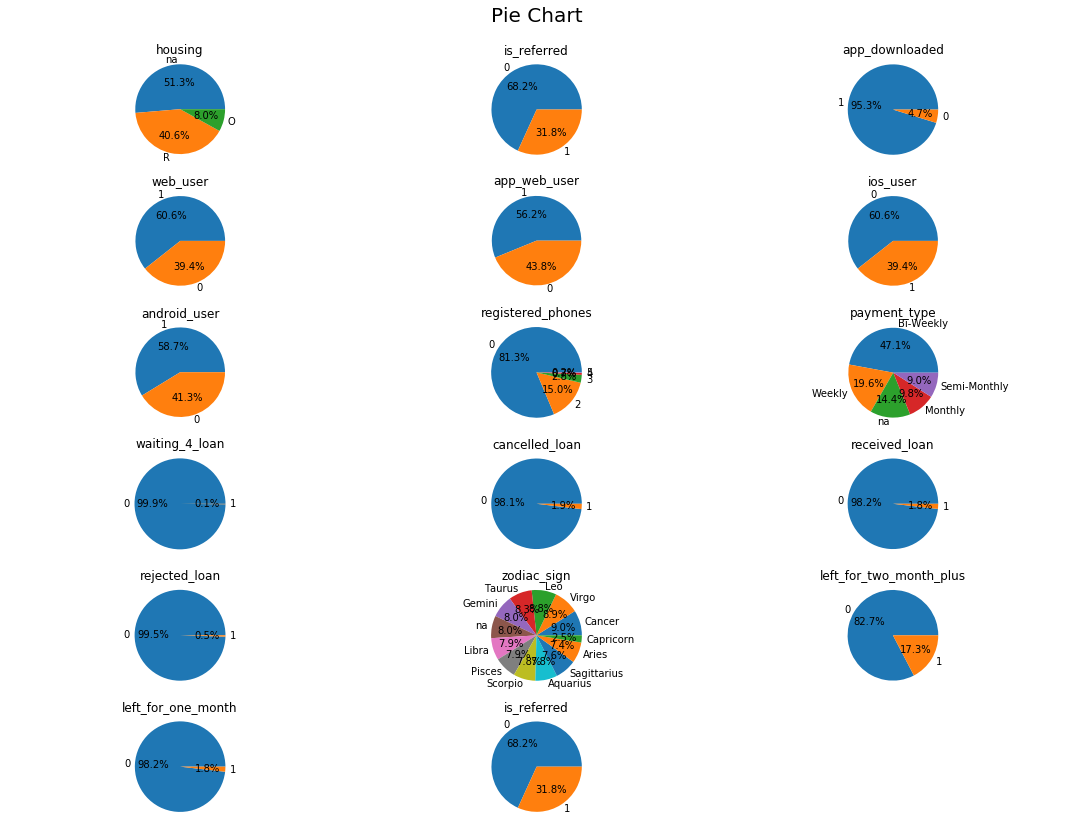

In [10]:
fig =plt.figure(figsize=(15,12))
plt.suptitle('Pie Chart', fontsize = 20)
for i in range(1, data2.shape[1]+1):
    plt.subplot(6,3,i)# 6 rows of graphs 
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(data2.columns.values[i - 1])
    values = data2.iloc[:, i-1].value_counts(normalize = True).values
    index = data2.iloc[:, i-1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct = '%1.1f%%')
    plt.axis('equal')
    

plt.tight_layout(rect =[0,0.03, 1, 0.95])

In [11]:
data[data2.waiting_4_loan == 1].churn.value_counts()

0    27
1     8
Name: churn, dtype: int64

In [12]:
data[data2.cancelled_loan == 1].churn.value_counts()

1    274
0    234
Name: churn, dtype: int64

In [13]:
data[data2.received_loan == 1].churn.value_counts()

1    292
0    199
Name: churn, dtype: int64

In [14]:
data[data2.rejected_loan == 1].churn.value_counts()

1    107
0     25
Name: churn, dtype: int64

In [15]:
data[data2.left_for_one_month == 1].churn.value_counts()

1    266
0    222
Name: churn, dtype: int64

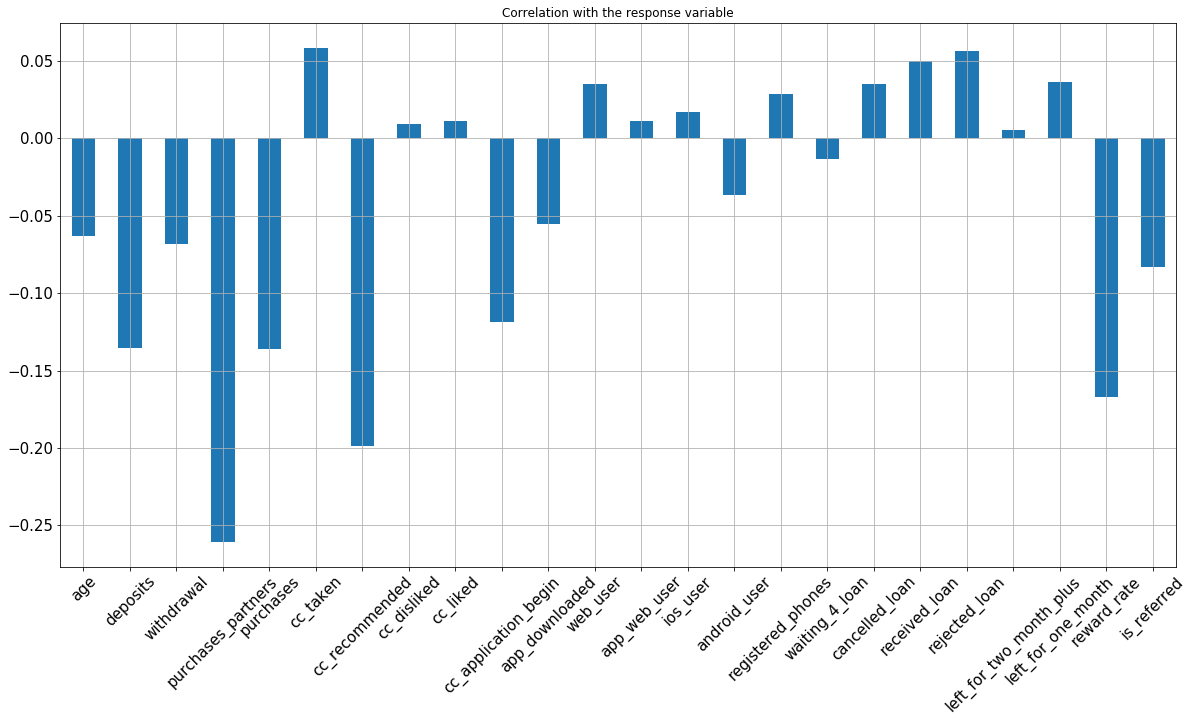

In [16]:
data.drop(columns = ['churn', 'user', 'housing', 
                     'payment_type','zodiac_sign']).corrwith(data.churn).plot.bar(
figsize = (20,10),title = 'Correlation with the response variable', fontsize= 15,
rot= 45, grid = True)
plt.savefig('Correlation with the response variable')

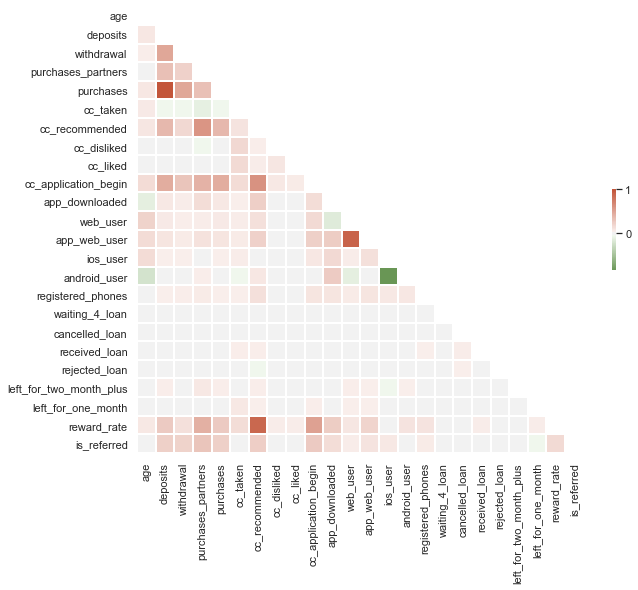

In [17]:
sn.set(style = 'white') #correlation matrix
corr = data.drop(columns = ['user', 'churn',]).corr() #compute the correlation matrix
mask = np.zeros_like(corr, dtype=np.bool) #generate mask for upper triangle
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize= (10,15)) #set up the matplotlib figure
cmap = sn.diverging_palette(120,20,as_cmap = True)
sn.heatmap(corr, mask = mask, cmap = cmap, vmax= 1, center = 0,
           square = True, linewidths = 1, cbar_kws={"shrink":.1})

In [18]:
data = data.drop(columns = ['app_web_user'])

In [19]:
data

,user,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,55409,0,37.0,na,0,0,0,0,0,0,...,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,23547,0,28.0,R,0,0,1,0,0,96,...,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,58313,0,35.0,R,47,2,86,47,0,285,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,8095,0,26.0,R,26,3,38,25,0,74,...,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,61353,1,27.0,na,0,0,2,0,0,0,...,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,24291,1,24.0,R,0,0,0,0,0,81,...,Weekly,0,0,0,0,Leo,0,0,1.07,1
26996,4116,1,26.0,na,0,0,2,0,0,1,...,Bi-Weekly,0,0,0,1,Cancer,1,0,0.67,0
26997,23740,0,22.0,na,0,0,37,0,0,98,...,Bi-Weekly,0,0,0,0,Taurus,0,0,0.93,0
26998,47663,1,46.0,na,2,0,16,2,0,58,...,Semi-Monthly,0,0,0,0,Aries,1,0,0.90,1


In [20]:
data.to_csv('new_churn_data_made.csv', index = False)

In [ ]:
#data = pd.read_csv('new_churn_data.csv')

In [ ]:
data

In [21]:
user_identifier = data['user'] # data preparation
data = data.drop(columns = ['user'])


In [22]:
data.housing.value_counts()

na    13856
R     10969
O      2171
Name: housing, dtype: int64

In [23]:
data =pd.get_dummies(data) 

In [24]:
data.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_O',
       'housing_R', 'housing_na', 'payment_type_Bi-Weekly',
       'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aquarius',
       'zodiac_sign_Aries', 'zodiac_sign_Cancer', 'zodiac_sign_Capricorn',
       'zodiac_sign_Gemini', 'zodiac_sign_Leo', 'zodiac_sign_Libra',
       'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio',
       'zodiac_sign_Taurus', 'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [25]:
data = data.drop(columns = ['housing_na', 'zodiac_sign_na','payment_type_na'])

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns = 'churn'),data['churn'], test_size = 0.2, random_state = 0)

## Feature Scaling and Balancing

In [27]:
y_train.value_counts()

0    12656
1     8940
Name: churn, dtype: int64

In [28]:
import random
pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

if len(pos_index)> len(neg_index):
    higher = pos_index
    lower = neg_index
else: 
    lower = pos_index
    higher = neg_index
    
random.seed(0)
higher = np.random.choice(higher,size = len(lower))
lower =np.asarray(lower)
new_indexes = np.concatenate((lower, higher))
X_train = X_train.loc[new_indexes,]
y_train = y_train.loc[new_indexes]

## Model training 

In [29]:
from sklearn.preprocessing import StandardScaler #feature scaling 
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test

In [30]:
X_train

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
11697,-0.620743,-0.357234,-0.276807,-0.605465,-0.356807,-0.169323,-0.917182,-0.061431,-0.074641,-0.571149,...,-0.313389,-0.158467,-0.293605,-0.308522,-0.293942,-0.291803,-0.282561,-0.298632,-0.299853,-0.312851
19770,-0.420896,-0.357234,-0.276807,-0.655044,-0.356807,-0.169323,0.305713,1.186743,-0.074641,-0.571149,...,-0.313389,-0.158467,-0.293605,-0.308522,3.402035,-0.291803,-0.282561,-0.298632,-0.299853,-0.312851
8356,0.278567,-0.357234,-0.276807,-0.655044,-0.356807,-0.169323,1.981533,-0.061431,-0.074641,-0.246709,...,-0.313389,-0.158467,-0.293605,-0.308522,-0.293942,-0.291803,-0.282561,-0.298632,-0.299853,3.196414
17887,0.578337,-0.357234,-0.276807,0.039066,-0.356807,-0.169323,-0.192504,-0.061431,-0.074641,-0.003380,...,-0.313389,-0.158467,-0.293605,-0.308522,-0.293942,-0.291803,-0.282561,-0.298632,3.334971,-0.312851
25153,-0.820589,-0.246364,-0.276807,-0.109672,-0.243735,-0.169323,-0.588812,-0.061431,-0.074641,-0.246709,...,-0.313389,-0.158467,-0.293605,-0.308522,-0.293942,3.426969,-0.282561,-0.298632,-0.299853,-0.312851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,-0.620743,-0.357234,-0.276807,-0.655044,-0.356807,-0.169323,-1.030413,-0.061431,-0.074641,-0.652259,...,-0.313389,-0.158467,-0.293605,-0.308522,-0.293942,-0.291803,-0.282561,3.348599,-0.299853,-0.312851
23156,-1.120359,-0.246364,0.625692,-0.084882,-0.243735,-0.169323,-0.407643,-0.061431,-0.074641,0.077730,...,-0.313389,-0.158467,-0.293605,3.241264,-0.293942,-0.291803,-0.282561,-0.298632,-0.299853,-0.312851
6135,0.878106,-0.357234,-0.276807,2.195764,-0.356807,-0.169323,0.271744,-0.061431,-0.074641,0.402170,...,-0.313389,-0.158467,-0.293605,3.241264,-0.293942,-0.291803,-0.282561,-0.298632,-0.299853,-0.312851
16642,-0.320973,-0.357234,-0.276807,0.485279,-0.356807,-0.169323,0.158513,-0.061431,-0.074641,-0.408929,...,-0.313389,-0.158467,-0.293605,3.241264,-0.293942,-0.291803,-0.282561,-0.298632,-0.299853,-0.312851


In [31]:
from sklearn.linear_model import LogisticRegression #fitting the model
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
y_pred = classifier.predict(X_test) #predicting the test set

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score,recall_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test,y_pred)


0.5866666666666667

In [34]:
precision_score(y_test, y_pred)

0.50177304964539

In [35]:
recall_score(y_test, y_pred)

0.12667860340196957

In [36]:
f1_score(y_test,y_pred)

0.20228734810578985

Test Data Accuracy: 0.5867


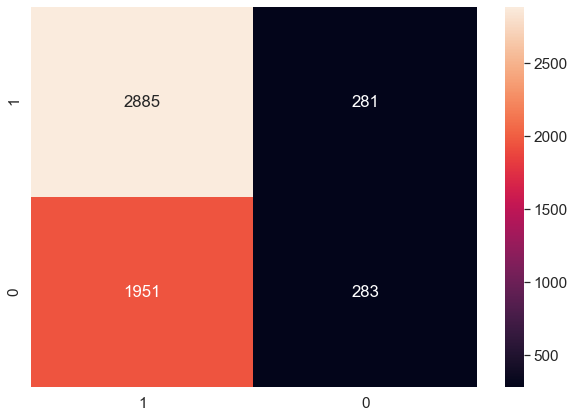

In [37]:
df_cm = pd.DataFrame(cm, index = (1, 0), columns = (1, 0))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))
plt.savefig('Test Data Accuracy')

## K-Fold Cross validation

In [38]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier,
                            X=X_train,
                            y= y_train,
                            cv= 10)

In [39]:
accuracies

array([0.65436242, 0.65548098, 0.65324385, 0.62583893, 0.63758389,
       0.6409396 , 0.64485459, 0.651566  , 0.64876957, 0.651566  ])

## Feature Selection

In [40]:
pd.concat([pd.DataFrame(X_train.columns,columns=["features"]),
          pd.DataFrame(np.transpose(classifier.coef_), columns =["coef"])], axis= 1)

,features,coef
0,age,-0.165600
1,deposits,0.295049
2,withdrawal,0.040569
3,purchases_partners,-0.707964
4,purchases,-0.437030
5,cc_taken,0.063903
6,cc_recommended,0.046292
7,cc_disliked,-0.002345
8,cc_liked,0.006648
9,cc_application_begin,0.036564


In [41]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [42]:
classifier = LogisticRegression()
rfe = RFE(classifier, 20)
rfe = rfe.fit(X_train, y_train)

In [43]:
print(rfe.support_)

[ True  True False  True  True  True  True False False False False  True
 False  True  True  True  True  True  True False  True  True  True False
  True  True False  True  True False False False False False False False
 False False False False False]


In [44]:
rfe.ranking_

array([ 1,  1,  2,  1,  1,  1,  1, 21, 20,  4, 17,  1, 16,  1,  1,  1,  1,
        1,  1, 11,  1,  1,  1,  6,  1,  1, 10,  1,  1,  5, 15, 14,  7, 18,
       12, 22,  8,  9,  3, 19, 13])

In [45]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train[X_train.columns[rfe.support_]], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
y_pred = classifier.predict(X_test[X_train.columns[rfe.support_]]) 

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score,recall_score
cm = confusion_matrix(y_test, y_pred)
# accuracy_score(y_test,y_pred)
#precision_score(y_test, y_pred)
recall_score(y_test, y_pred)
# f1_score(y_test,y_pred)

0.1548791405550582

Test Data Accuracy: 0.5904


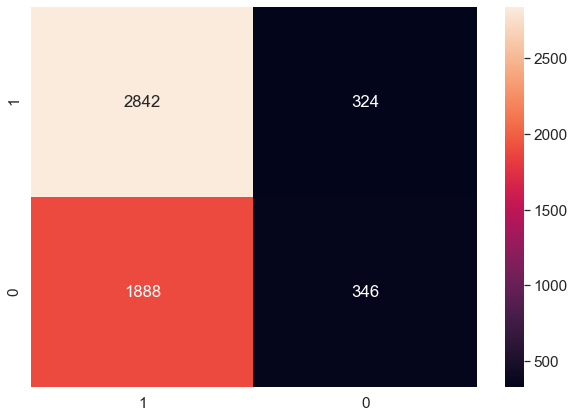

In [48]:
df_cm = pd.DataFrame(cm, index = (1, 0), columns = (1, 0))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))


In [49]:
pd.concat([pd.DataFrame(X_train.columns[rfe.support_], columns = ['features']),
          pd.DataFrame(np.transpose(classifier.coef_), columns =['coef'])], axis = 1)

,features,coef
0,age,-0.167004
1,deposits,0.312436
2,purchases_partners,-0.701649
3,purchases,-0.423708
4,cc_taken,0.071327
5,cc_recommended,0.060099
6,web_user,0.127697
7,android_user,-0.052676
8,registered_phones,0.102421
9,waiting_4_loan,-0.046651


In [50]:
final_results = pd.concat([y_test,user_identifier], axis = 1).dropna()
final_results['predicted_churn'] = y_pred
final_results = final_results[['user', 'churn', 'predicted_churn']].reset_index(drop=True)

In [51]:
final_results

,user,churn,predicted_churn
0,61353,1.0,1
1,67679,0.0,0
2,21269,0.0,0
3,69531,0.0,0
4,25997,0.0,0
...,...,...,...
5395,22377,0.0,0
5396,24291,1.0,0
5397,23740,0.0,1
5398,47663,1.0,0


This model provides the indication of which users are likely to churn. The features show disengagement with the product and thereby give a sense of those who are just a bit likely to churn.
In order predict the churn accurately adding a time demension to churn.